Importing Libraries

In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Loading the fresh csv file from processed data folder

In [2]:
def get_processed_dir():
    project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))  
    local_path = os.path.join(project_root, "data", "processed_data")
    # Detects path based on environment (Docker vs. local)
    if os.path.exists("/opt/airflow/data/processed_data"):
        return "/opt/airflow/data/processed_data"  # Docker path
    else:
        return local_path # Local path
    
process_folder = get_processed_dir()
print(process_folder)

files = [ f for f in os.listdir(process_folder) if f.startswith('cleaned_') and 
         f.endswith('.csv')]
files.sort(reverse=True)
latest_file = files[0]
latest_path_input = os.path.join(process_folder,latest_file)
df = pd.read_csv(latest_path_input)

print("laoding file ", latest_file)
df.head(100)

/opt/airflow/data/processed_data
laoding file  cleaned_2025-07-09.csv


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
57,58,2023-11-13,CUST058,Male,18,Clothing,4,300,1200
58,59,2023-07-05,CUST059,Male,62,Clothing,1,50,50
59,60,2023-10-23,CUST060,Male,30,Beauty,3,50,150
60,61,2023-04-09,CUST061,Male,21,Beauty,4,50,200


Check for duplicate records


In [3]:
duplicate_count = df.duplicated().sum()
print("Number of duplicated rows", duplicate_count)

Number of duplicated rows 0


Check for null/missing values

In [4]:
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Checking the data frame column datatype information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    62 non-null     int64 
 1   Date              62 non-null     object
 2   Customer ID       62 non-null     object
 3   Gender            62 non-null     object
 4   Age               62 non-null     int64 
 5   Product Category  62 non-null     object
 6   Quantity          62 non-null     int64 
 7   Price per Unit    62 non-null     int64 
 8   Total Amount      62 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 4.5+ KB


Changing the Date column datatype to datetime datatype

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    62 non-null     int64         
 1   Date              62 non-null     datetime64[ns]
 2   Customer ID       62 non-null     object        
 3   Gender            62 non-null     object        
 4   Age               62 non-null     int64         
 5   Product Category  62 non-null     object        
 6   Quantity          62 non-null     int64         
 7   Price per Unit    62 non-null     int64         
 8   Total Amount      62 non-null     int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 4.5+ KB


In [7]:
df.head(20)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


Added a new column computed total to verify whether the Total sales amount is correctly calculated or not.

In [8]:
df['computed_total'] = df['Quantity'] * df['Price per Unit']


error = df[df['computed_total'] != df['Total Amount']]
print("Error in number of records", len(error))
df.head(20)


Error in number of records 0


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,computed_total
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,200


Started some grouping w.r.t Product category 

In [9]:
product_category_summary = df.groupby('Product Category').agg(
    {
    'Total Amount': 'sum',
    'Quantity': 'sum'
    }
).reset_index()
product_category_summary.columns = ['Product Category', 'Total Sales Amount', 'Total Quantity']
product_category_summary

,Product Category,Total Sales Amount,Total Quantity
0,Beauty,7120,58
1,Clothing,8735,56
2,Electronics,11340,40


Minimum selling Product category with amount

In [10]:
min_category = product_category_summary.loc[product_category_summary['Total Sales Amount'].idxmin()]
print(f"Minimum selling category of item with it total sales : {min_category['Product Category']} → ₹{min_category['Total Sales Amount']}")

Minimum selling category of item with it total sales : Beauty → ₹7120


Maximum selling Product category with amount

In [11]:
max_category = product_category_summary.loc[product_category_summary['Total Sales Amount'].idxmax()]
print(f"Max selling category of item with it total sales : {max_category['Product Category']} → ₹{max_category['Total Sales Amount']}")

Max selling category of item with it total sales : Electronics → ₹11340


Grouped according to Product Category and Gender to understand Gender-wise bifurcation in each Product Category.

In [12]:
category_gender_sales = df.groupby(['Product Category', 'Gender']).agg({
    'Total Amount': 'sum'
}).reset_index()
category_gender_sales

,Product Category,Gender,Total Amount
0,Beauty,Female,4910
1,Beauty,Male,2210
2,Clothing,Female,3145
3,Clothing,Male,5590
4,Electronics,Female,6910
5,Electronics,Male,4430


Simple Re-structuring of the dataframe, Product category is treated as index.

In [13]:
pivot_sales = category_gender_sales.pivot(index='Product Category', columns='Gender', values='Total Amount').fillna(0)

pivot_sales['Total Sales'] = pivot_sales.sum(axis=1)

pivot_sales

Gender,Female,Male,Total Sales
Product Category,,,
Beauty,4910,2210,7120
Clothing,3145,5590,8735
Electronics,6910,4430,11340


Graph Visualization

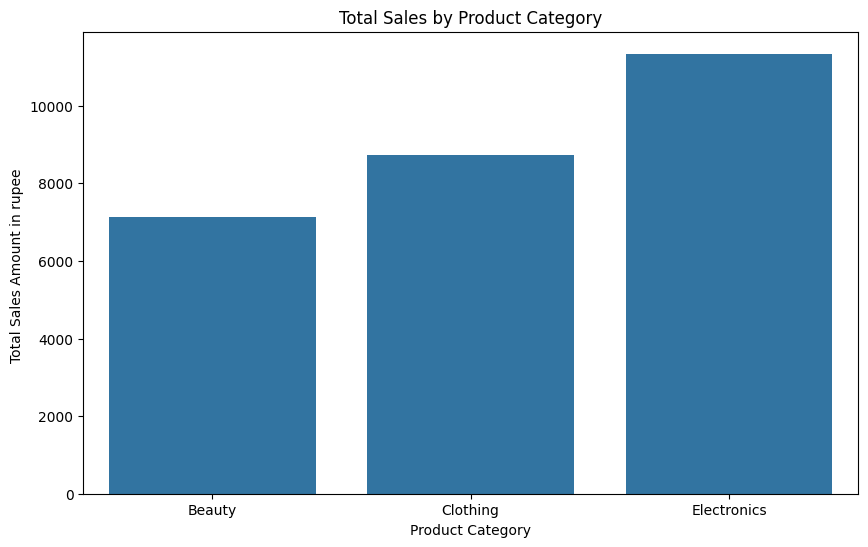

In [14]:

plt.figure(figsize=(10, 6))
sns.barplot(data=product_category_summary, x='Product Category', y='Total Sales Amount')

plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales Amount in rupee ")
plt.xlabel("Product Category")
plt.show()

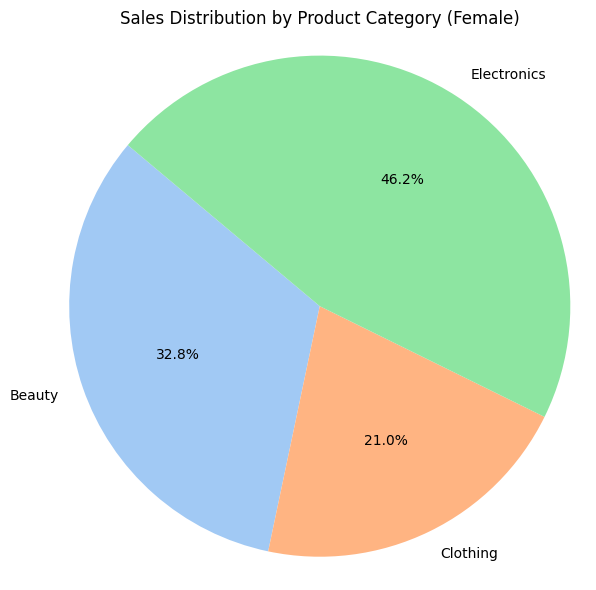

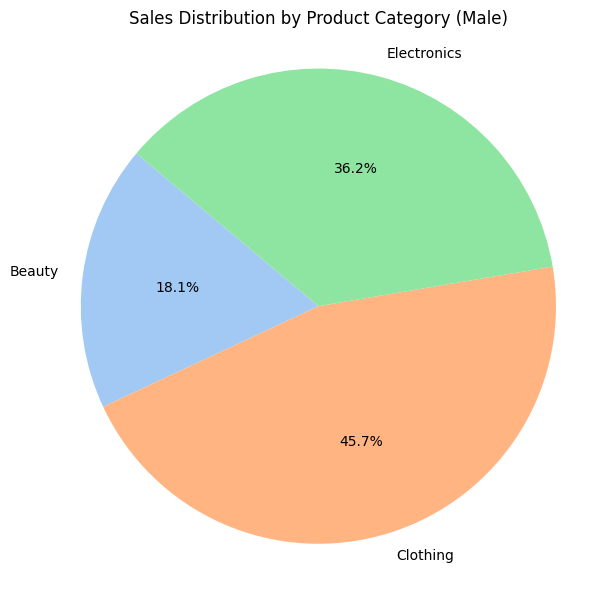

In [15]:

gender_category_sales = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().reset_index()


genders = gender_category_sales['Gender'].unique()

for gender in genders:
    plt.figure(figsize=(6, 6))
    data = gender_category_sales[gender_category_sales['Gender'] == gender]
    plt.pie(
        data['Total Amount'],
        labels=data['Product Category'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel')
    )
    plt.title(f"Sales Distribution by Product Category ({gender})")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


Saving the tranformed and aggregated data in separate folders

In [16]:
os.makedirs("../data/transformed", exist_ok=True)

In [17]:
df.to_csv("../data/transformed/final_cleaned_sales_data.csv", index=False)

In [18]:
os.makedirs("../data/aggregated", exist_ok=True)

In [19]:
product_category_summary.to_csv("../data/aggregated/sales_by_category.csv", index=False)

In [20]:
category_gender_sales.to_csv("../data/aggregated/sales_by_gender.csv", index=False)
